In [ ]:
import numpy as np
import cv2 as cv
img = cv.imread('image.png',0)
ret,thresh = cv.threshold(img,127,255,0)
contours,hierarchy = cv.findContours(thresh, 1, 2)
cnt = contours[0]
M = cv.moments(cnt)
print( M )

In [ ]:
area = cv.contourArea(cnt)

In [ ]:
perimeter = cv.arcLength(cnt,True)

In [ ]:
epsilon = 0.1*cv.arcLength(cnt,True)
approx = cv.approxPolyDP(cnt,epsilon,True)

In [ ]:
rect = cv.minAreaRect(cnt)
box = cv.boxPoints(rect)
box = np.int0(box)
cv.drawContours(img,[box],0,(0,0,255),2)

In [ ]:
cv.imwrite('image_1.png', img)

In [ ]:
import cv2
import numpy as np

image = cv2.imread('image.png')
original = image.copy()
greenLower = (89, 0, 162)
greenUpper = (255, 107, 224)


blurred = cv2.GaussianBlur(image, (11, 11), 0)
hsv = cv2.cvtColor(blurred, cv2.COLOR_BGR2HSV)
mask = cv2.inRange(hsv, greenLower, greenUpper)
mask = cv2.erode(mask, None, iterations=2)
mask = cv2.dilate(mask, None, iterations=2) 

ROI_number = 0

cnts = cv2.findContours(mask.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts = cnts[0] if len(cnts) == 2 else cnts[1]
for c in cnts:
    x,y,w,h = cv2.boundingRect(c)
    center = (x+w//2, y+h//2)
    rx =w/2
    ry=h/2
    if(rx and ry > 150):
        cv2.rectangle(image, (x, y), (x + w, y + h), (0,0,255), 2)
        ROI = original[y:y+h, x:x+w]
        cv2.imwrite('Image_{}.png'.format(ROI_number), ROI)
    ROI_number += 1
cv2.waitKey()


In [40]:
import cv2
import numpy as np

image = cv2.imread('image.png')
original = image.copy()
greenLower = (89, 0, 162)
greenUpper = (255, 107, 224)


blurred = cv2.GaussianBlur(image, (11, 11), 0)
hsv = cv2.cvtColor(blurred, cv2.COLOR_BGR2HSV)
mask = cv2.inRange(hsv, greenLower, greenUpper)
mask = cv2.erode(mask, None, iterations=2)
mask = cv2.dilate(mask, None, iterations=2) 

ROI_number = 0

cnts = cv2.findContours(mask.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts = cnts[0] if len(cnts) == 2 else cnts[1]
for c in cnts:
    rect = cv2.minAreaRect(c)
    #(center (x,y), (width, height), angle of rotation )
    rx = rect[1][0]/2
    ry= rect[1][1]/2
    if((rx > 150) and (ry > 150)):
        print(rect)
        print(rx,ry)
        x = int(rect[0][0])
        y = int(rect[0][1])
        h = int(rect[1][0])
        w = int(rect[1][1])  
        print(x,y,h,w)
        box = cv2.boxPoints(rect)
        box = np.int0(box)
        cv2.drawContours(image,[box],0,(0,0,255),2)

        ROI = original[h, w]
        cv2.imwrite('Image_{}.png'.format(ROI_number), ROI)

        
    ROI_number += 1
cv2.waitKey()

((206.2210235595703, 349.7342529296875), (330.39862060546875, 355.3582458496094), 81.6561050415039)
165.19931030273438 177.6791229248047
206 349 330 355


-1

In [41]:
box

array([[  6, 212],
       [358, 160],
       [405, 487],
       [ 54, 538]])

In [31]:
y

349

In [18]:
rect

((205.21942138671875, 30.43383026123047),
 (105.94490814208984, 429.8912353515625),
 81.74747467041016)

In [10]:
rect[1][0]

105.94490814208984

In [1]:
from reachy_sdk import ReachySDK
reachy = ReachySDK('localhost') 

In [2]:
for i in reachy.fans.values():
    i.on()


KeyboardInterrupt: 

In [2]:
import matplotlib.pyplot as plt

In [13]:
reachy.left_camera.zoom_level

<ZoomLevel.ZERO: 0>

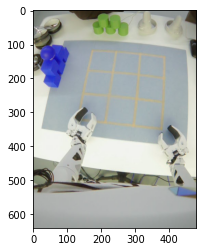

In [3]:
# reachy.left_camera.zoom_homing()
plt.imshow(reachy.left_camera.last_frame)

In [8]:
reachy.left_camera.zoom_homing()

True